In [2]:
import yfinance as yf

# Download intraday data for Microsoft (MSFT)
data = yf.download(tickers='MSFT', period='1d', interval='1m')
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           MSFT        MSFT        MSFT        MSFT   
Datetime                                                                    
2024-10-24 13:30:00+00:00  425.492493  425.492493  425.940002  424.910004   
2024-10-24 13:31:00+00:00  424.429993  424.429993  425.679993  424.359985   
2024-10-24 13:32:00+00:00  425.335785  425.335785  425.449890  423.910004   
2024-10-24 13:33:00+00:00  425.910004  425.910004  425.950195  425.165009   
2024-10-24 13:34:00+00:00  424.815002  424.815002  425.829895  424.809998   

Price                            Open  Volume  
Ticker                           MSFT    MSFT  
Datetime                                       
2024-10-24 13:30:00+00:00  425.325012  605062  
2024-10-24 13:31:00+00:00  425.574890   78959  
2024-10-24 13:32:00+00:00  424.149994   82772  
2024-10-24 13:33:00+00:00  425.364990   69513  
2024-10-24 13:34:00+00:00  425.698700   39032  

In [3]:
import pandas as pd

# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values
data = data.dropna()

# Reset index to make 'Datetime' a column
data.reset_index(inplace=True)
print(data.head())


Price      Ticker
Adj Close  MSFT      0
Close      MSFT      0
High       MSFT      0
Low        MSFT      0
Open       MSFT      0
Volume     MSFT      0
dtype: int64
Price                   Datetime   Adj Close       Close        High  \
Ticker                                  MSFT        MSFT        MSFT   
0      2024-10-24 13:30:00+00:00  425.492493  425.492493  425.940002   
1      2024-10-24 13:31:00+00:00  424.429993  424.429993  425.679993   
2      2024-10-24 13:32:00+00:00  425.335785  425.335785  425.449890   
3      2024-10-24 13:33:00+00:00  425.910004  425.910004  425.950195   
4      2024-10-24 13:34:00+00:00  424.815002  424.815002  425.829895   

Price          Low        Open  Volume  
Ticker        MSFT        MSFT    MSFT  
0       424.910004  425.325012  605062  
1       424.359985  425.574890   78959  
2       423.910004  424.149994   82772  
3       425.165009  425.364990   69513  
4       424.809998  425.698700   39032  


Price                   Datetime    Spread
Ticker                                    
0      2024-10-24 13:30:00+00:00  1.029999
1      2024-10-24 13:31:00+00:00  1.320007
2      2024-10-24 13:32:00+00:00  1.539886
3      2024-10-24 13:33:00+00:00  0.785187
4      2024-10-24 13:34:00+00:00  1.019897


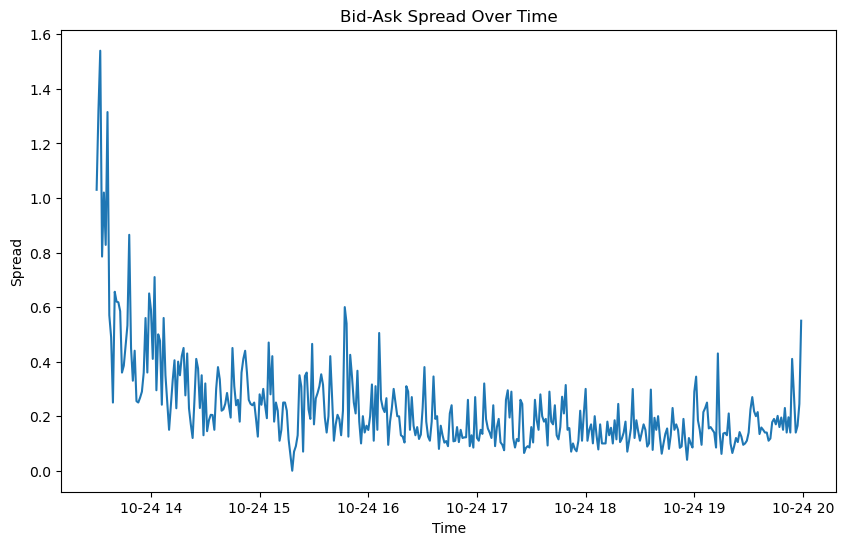

In [4]:
# Example: Calculate bid-ask spread
data['Spread'] = data['High'] - data['Low']
print(data[['Datetime', 'Spread']].head())

# Visualize the spread
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Datetime'], data['Spread'])
plt.title('Bid-Ask Spread Over Time')
plt.xlabel('Time')
plt.ylabel('Spread')
plt.show()


Price                   Datetime Price_Impact
Ticker                                       
0      2024-10-24 13:30:00+00:00          NaN
1      2024-10-24 13:31:00+00:00    -1.062500
2      2024-10-24 13:32:00+00:00     0.905792
3      2024-10-24 13:33:00+00:00     0.574219
4      2024-10-24 13:34:00+00:00    -1.095001


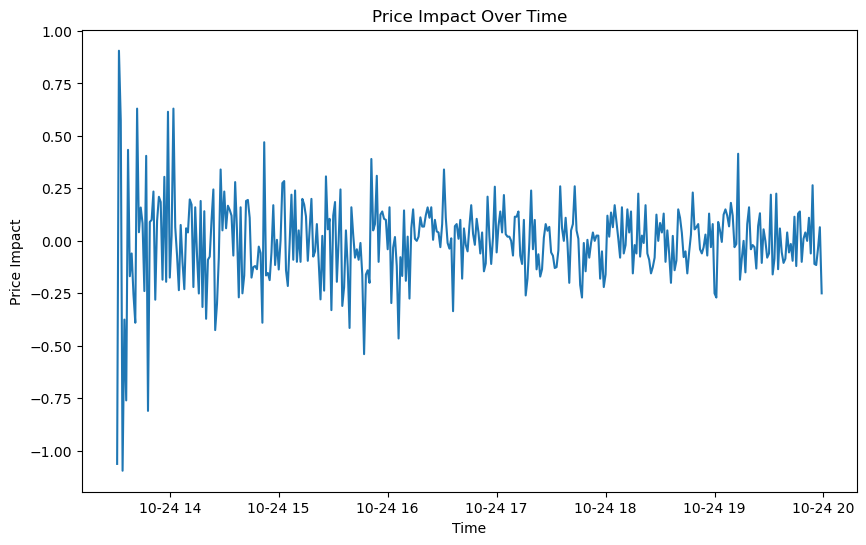

In [5]:
# Example: Calculate price impact
data['Price_Impact'] = data['Close'].diff()
print(data[['Datetime', 'Price_Impact']].head())

# Visualize price impact
plt.figure(figsize=(10, 6))
plt.plot(data['Datetime'], data['Price_Impact'])
plt.title('Price Impact Over Time')
plt.xlabel('Time')
plt.ylabel('Price Impact')
plt.show()


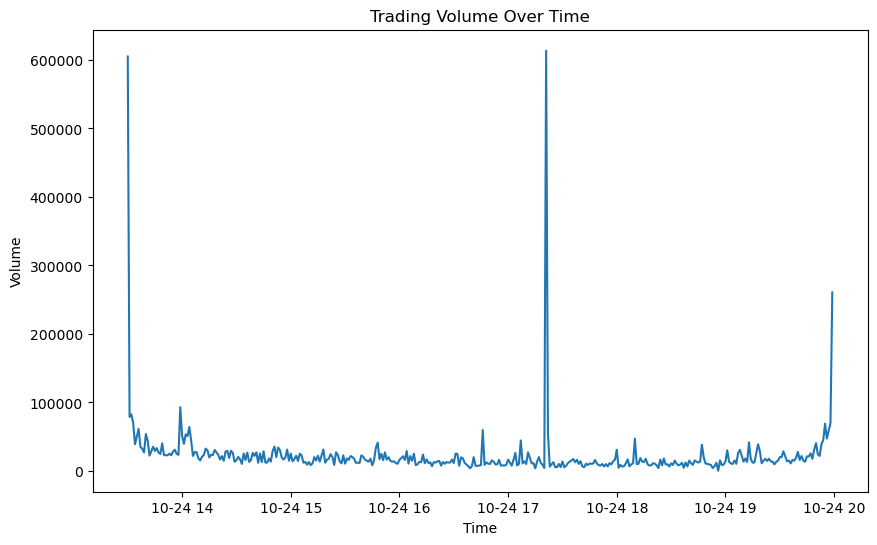

In [6]:
# Example: Calculate and visualize trading volume
plt.figure(figsize=(10, 6))
plt.plot(data['Datetime'], data['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


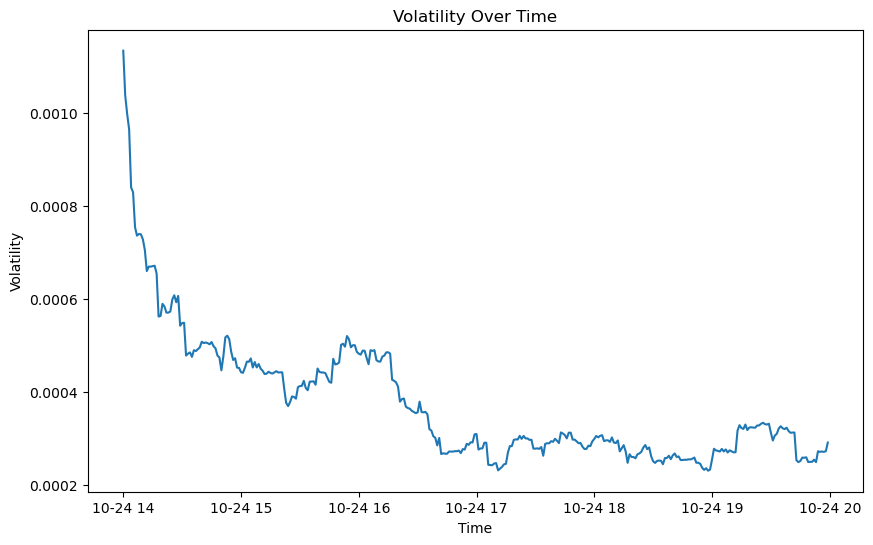

In [7]:
# Example: Volatility clustering
data['Returns'] = data['Close'].pct_change()
data['Volatility'] = data['Returns'].rolling(window=30).std()

plt.figure(figsize=(10, 6))
plt.plot(data['Datetime'], data['Volatility'])
plt.title('Volatility Over Time')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.show()
